# Project: Region Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#merging">Data Merging</a></li>
<li><a href="#missing">Missing Data Fix</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#research_life_expectancy">Research Life Expectancy</a></li>
<li><a href="#research_income">Research Income</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Region Data Analysis**

What are the top regions in the world, and how are they performing better than others? Are the measure consistent over a period? Can we compare the key metrics over time to understand the change? What are the key metrics and their correlations other metrics?
The analysis is performed to answer these questions.

**Gapminder**
>uses data downloaded from Gapminder World. 
In this analysis the key factors that were considered per region is as follows
Life Expectancy, Economic growth, corruption perception, literacty rate, population, forest density, co2 emissions.
Correlation between the factors, ie economic growth vs literacy rate. Population vs forest density vs co2 emissions vs life expectancy. Due to the data limitations, the analysis was performed between 2005 and 2015.

In [3]:
# importing the libraries as needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'


In [4]:
##########################################################################
# since there are multiple file that needs to be used for analysis,
# Functions are introduced to avoid repetetive work
# Also, I have verified several files to work on the possible indicators
# the functions helped reduced the effort time

##########################################################################
# Function Name : unpivot 
# Usage : The function converts the data in pivot form to unpivotted form
# Arguments : fname - filename (csv filename)
#            varname - pivotal values will be transformed to this new varname
#            year - year for which data is filtered
#########################################################################
    
def unpivot(fname, varname, year):
    #read csv file into dataframe
    df = pd.read_csv(fname)
    column_name = varname+'_'+year
    
    #reset index produces indexing which will be used in melt (unpivoting) functionality
    df.reset_index(inplace=True)
    
    #below function transforms from pivot to unpivot
    df_melt = pd.melt(df, id_vars=['index', 'country'], var_name=['year'])
    
    #unpivot values are renamed with the variable name + year
    df_melt = df_melt.rename(columns={'value': column_name})
    df_melt = df_melt.query("year == '"+year+"'")
    
    #GDP values are in billions, converted data in millions
    if(varname=='gdp'):
        df_melt[column_name] = np.where(df_melt[column_name] > 0, df_melt[column_name] / 1000000, 0)
    
    #dropping the columnns year and index which are no longer used for our analysis
    #year is filtered and the column name will include the year name
    #hence year is no longer used for analysis
    df_melt.drop(['index'], axis=1, inplace=True)    
    df_melt = df_melt.drop(['year'], axis=1)
    
    return df_melt

##########################################################################
# Function Name : merge 
# Usage : The function merges given dataframes
# Arguments : df1 - first data frame
#            df2 - second one that needs to be merged
# returns   : merged data frame
#########################################################################

def merge(df1, df2):
    return pd.merge(df1, df2, how='inner', on=["country"], 
                        sort=False, copy=True, indicator=False)

<a id='wrangling'></a>
## Data Wrangling

> The following are the key points considered during data wrangling.
* Year 2005 and 2015 were used for the analysis - reason for this, most of the data sets has data upto 2015.
* Since every file has one numeric value pivoted by year, the function takes care of replacing the null values with mean value.
* Country is used a join during merge operations since the data is filtered for specific year and data loaded in to data frame is unique per country


### General Properties

### Assessment of csv files
> Identified life_expectancy, gdp, income per person etc for incidators to measure. However for initial assessment data to figure out the year for which the data is available, the following was used to identify the years for which the data existed. This was iterated for several files.

Reviewing the csv data files to check the availability of data - ie. Years for which data is available.

In [5]:
df = pd.read_csv('at_least_basic_sanitation_overall_access_percent.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 17 columns):
country    194 non-null object
2000       183 non-null float64
2001       185 non-null float64
2002       188 non-null float64
2003       188 non-null float64
2004       188 non-null float64
2005       188 non-null float64
2006       192 non-null float64
2007       193 non-null float64
2008       193 non-null float64
2009       193 non-null float64
2010       193 non-null float64
2011       194 non-null float64
2012       194 non-null float64
2013       194 non-null float64
2014       193 non-null float64
2015       192 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.8+ KB


### **2005 csv load / unpivoting**
Loading the CSV files and performing data filtering for year 2005. In this process year field is also removed after unpivoting data. So that only data required for analysis will exist which will be merged to a single file in the later step.

In [6]:
# Loading the 2005 data using the functions created above

df_gdp1 = unpivot('total_gdp_us_inflation_adjusted.csv', 'gdp', '2005')
df_life_exp1 = unpivot('life_expectancy_years.csv', 'life_expectancy', '2005')
df_water_source1 = unpivot('at_least_basic_water_source_overall_access_percent.csv', 'water_source', '2005')
df_population_growth1 = unpivot('population_growth_annual_percent.csv', 'population_growth', '2005')
df_basic_sanitation1 = unpivot('at_least_basic_sanitation_overall_access_percent.csv', 'basic_sanitation', '2005')
df_income1= unpivot('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', 'income', '2005')
df_employment1 = unpivot('aged_15plus_employment_rate_percent.csv', 'employment', '2005')

### **2015 csv load / unpivoting**
Loading the CSV files and performing data filtering for year 2005. In this process year field is also removed after unpivoting data. So that only data required for analysis will exist which will be merged to a single file in the later step.

In [7]:
# Loading the 2015 data using the functions created above

df_gdp2 = unpivot('total_gdp_us_inflation_adjusted.csv', 'gdp', '2015')
df_life_exp2 = unpivot('life_expectancy_years.csv', 'life_expectancy', '2015')
df_water_source2 = unpivot('at_least_basic_water_source_overall_access_percent.csv', 'water_source', '2015')
df_population_growth2 = unpivot('population_growth_annual_percent.csv', 'population_growth', '2015')
df_basic_sanitation2 = unpivot('at_least_basic_sanitation_overall_access_percent.csv', 'basic_sanitation', '2015')
df_income2 = unpivot('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', 'income', '2015')
df_employment2 = unpivot('aged_15plus_employment_rate_percent.csv', 'employment', '2015')

<a id='merging'></a>
### Merging data


df_final a single data frame is created which will have merged data of all the indicators. merge is a function created in the first section. Every indicator has 2 files, ending with suffix 1 for 2005 and 2 for 2010. Files are merged by indicators 1 followed by 2, which helps in quick data comparison. At the end, head is used for a quick check on the merge.

In [8]:
df_final = merge(df_life_exp1, df_life_exp2)

df_final = merge(df_final, df_basic_sanitation1) 
df_final = merge(df_final, df_basic_sanitation2) 

df_final = merge(df_final, df_water_source1)
df_final = merge(df_final, df_water_source2)

df_final = merge(df_final, df_population_growth1)
df_final = merge(df_final, df_population_growth2)

df_final = merge(df_final, df_income1)
df_final = merge(df_final, df_income2)

df_final = merge(df_final, df_employment1)
df_final = merge(df_final, df_employment2)

df_final = merge(df_final, df_gdp1)
df_final = merge(df_final, df_gdp2)
df_final.head(10)

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015
0,Afghanistan,53.9,57.9,28.1,39.2,37.3,63.0,3.870,2.940,1140,1750,48.5,49.1,9760.0,20900.0
1,Albania,74.9,77.6,92.2,97.7,87.9,91.4,-0.512,-0.291,7460,11000,47.8,46.8,9600.0,13000.0
2,Algeria,75.4,77.3,85.3,87.5,91.2,93.5,1.380,1.920,12300,13700,36.0,36.8,142000.0,190000.0
3,Angola,56.5,64.0,26.7,39.4,39.0,41.0,3.580,3.430,3950,6230,61.0,72.1,46700.0,104000.0
4,Argentina,75.2,76.5,94.8,94.8,99.2,99.6,1.070,1.010,15500,19100,54.9,55.7,334000.0,456000.0
5,Armenia,72.5,75.4,90.8,91.6,96.7,98.9,-0.647,0.369,5360,8180,46.9,48.9,7670.0,11500.0
6,Australia,81.1,82.6,100.0,100.0,99.8,100.0,1.320,1.460,38900,43800,61.3,61.1,994000.0,1310000.0
7,Austria,79.5,81.4,100.0,100.0,100.0,100.0,0.681,1.120,41200,44100,54.8,56.7,367000.0,414000.0
8,Azerbaijan,67.6,71.8,73.7,89.3,79.1,84.4,1.020,1.190,8050,16700,58.8,62.3,24800.0,59000.0
9,Bahamas,73.0,73.6,90.0,92.0,98.1,97.8,2.060,1.210,25400,21700,67.8,66.6,10200.0,10500.0


<a id='missing'></a>
### Fixing - missing values
df_final.info was used to find the missing values on each indicators.

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 15 columns):
country                   175 non-null object
life_expectancy_2005      175 non-null float64
life_expectancy_2015      175 non-null float64
basic_sanitation_2005     171 non-null float64
basic_sanitation_2015     175 non-null float64
water_source_2005         172 non-null float64
water_source_2015         174 non-null float64
population_growth_2005    175 non-null float64
population_growth_2015    174 non-null float64
income_2005               175 non-null int64
income_2015               175 non-null int64
employment_2005           175 non-null float64
employment_2015           175 non-null float64
gdp_2005                  175 non-null float64
gdp_2015                  175 non-null float64
dtypes: float64(12), int64(2), object(1)
memory usage: 21.9+ KB


### Reading missing data
isnull methods were applied for the indicators that displayed less than 175 not null values in the previous cell.

In [10]:
df_final[df_final.basic_sanitation_2005.isnull()]

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015
22,Brunei,76.8,76.9,NaN,96.3,NaN,99.5,1.560,1.4100,83000,74600,63.6,63.0,13300.0,13600.0
77,Italy,80.8,82.3,NaN,99.3,100.0,100.0,0.491,-0.0964,37600,34200,45.2,42.6,2160000.0,2060000.0
105,Montenegro,75.0,76.9,NaN,95.9,NaN,97.6,0.148,0.0561,11400,15300,35.3,40.3,3440.0,4530.0
128,Romania,72.4,75.1,NaN,81.8,100.0,100.0,-0.618,-0.4710,14700,20500,49.6,50.6,146000.0,191000.0


In [11]:
df_final[df_final.water_source_2005.isnull()]

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015
22,Brunei,76.8,76.9,NaN,96.3,NaN,99.5,1.560,1.4100,83000,74600,63.6,63.0,13300.0,13600.0
90,Libya,75.2,74.2,99.7,99.7,NaN,96.8,1.530,0.4960,26000,13500,41.8,42.8,61700.0,37900.0
105,Montenegro,75.0,76.9,NaN,95.9,NaN,97.6,0.148,0.0561,11400,15300,35.3,40.3,3440.0,4530.0


In [12]:
df_final[df_final.water_source_2015.isnull()]

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015
168,Uzbekistan,66.7,70.1,97.9,100.0,89.4,NaN,1.16,1.74,3070,5700,58.0,60.2,26100.0,57900.0


In [13]:
df_final[df_final.population_growth_2015.isnull()]

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015
51,Eritrea,60.5,63.4,9.01,11.3,17.4,19.3,2.82,NaN,1630,1240,73.8,76.1,2200.0,0.0


### Missing data 
Over all missing data was 9 entries. with the above results, I have decided to replace with mean values.

In [14]:
df_final['basic_sanitation_2005'].fillna(df_final['basic_sanitation_2005'].mean(), inplace=True)
df_final[df_final.basic_sanitation_2005.isnull()] #verifying the fillna method

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015


In [15]:
df_final['water_source_2005'].fillna(df_final['water_source_2005'].mean(), inplace=True)
df_final[df_final.water_source_2005.isnull()] #verifying the fillna method

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015


In [16]:
df_final['water_source_2015'].fillna(df_final['water_source_2015'].mean(), inplace=True)
df_final[df_final.water_source_2015.isnull()]

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015


In [17]:
df_final['population_growth_2015'].fillna(df_final['population_growth_2015'].mean(), inplace=True)
df_final[df_final.population_growth_2015.isnull()]

,country,life_expectancy_2005,life_expectancy_2015,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,employment_2005,employment_2015,gdp_2005,gdp_2015


<a id='eda'></a>
## Exploratory Data Analysis

#### Quick assessment of the merged data. 
Histograms for both 2005, 2015 next to each other gives a quick glance if there are significant change.

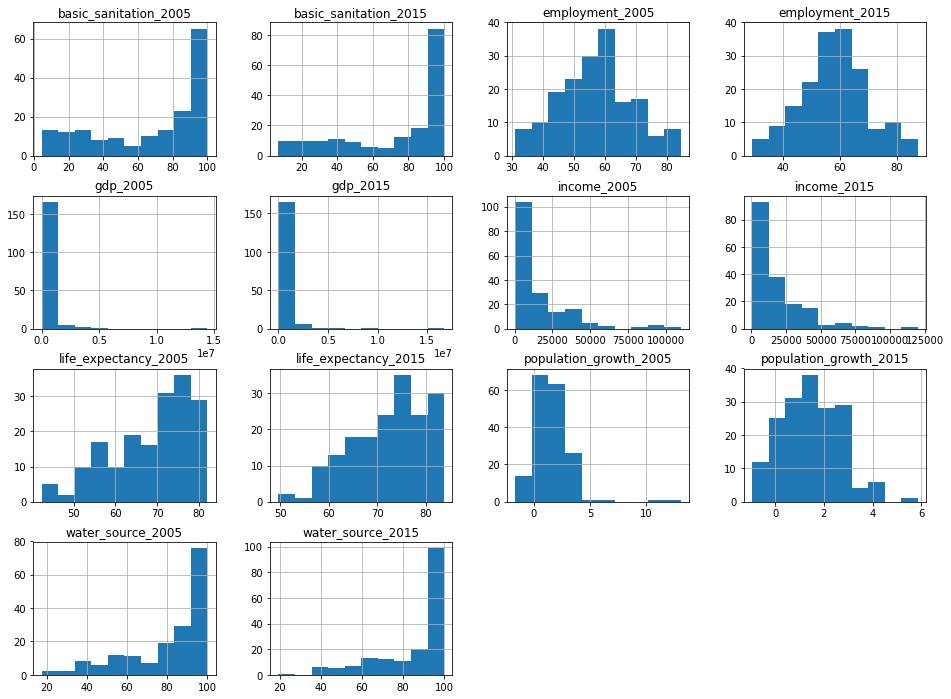

In [17]:
df_final.hist(figsize=(16,12));

To answer the question, has there been changes across regions in terms of Sanitation, water Source, Income, Employment since 2005. To do this histogram comparison is run for each indicators yearly and place on top of each other to compare.

##### **Basic Sanitation **
Histogram compare for basic sanitation. The below comparison helps to understand how basic sanitation improved across regions in 2015 since 2005.

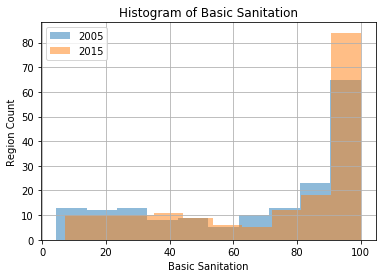

In [24]:
###Histogram Compare
#Basic sanitation
df_final.basic_sanitation_2005.hist(label='2005', alpha=.5, figsize=(6,4));
df_final.basic_sanitation_2015.hist(label='2015', alpha=.5, figsize=(6,4));
plt.title("Histogram of Basic Sanitation")
plt.xlabel("Basic Sanitation")
plt.ylabel("Region Count")
plt.legend();

**Result** : 100% basic Sanitation has moved from 65 regions to 80 regions since 2005. Overall there is a good improvement on sanitation across regions.

##### **Life Expectancy**
Histogram compare for Life Expectancy. The below comparison helps to understand how life expectancy improved across regions in 2015 since 2005.

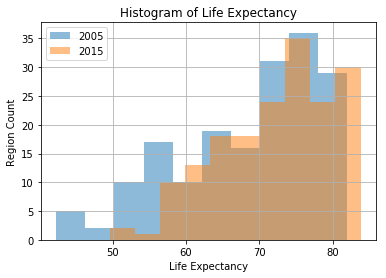

In [25]:
#Life Expectancy
df_final.life_expectancy_2005.hist(label='2005', alpha=.5, figsize=(6,4));
df_final.life_expectancy_2015.hist(label='2015', alpha=.5, figsize=(6,4));
plt.title("Histogram of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Region Count")
plt.legend();

**Result** : There is a great improvement in terms of life expectancy across regions. The mininum levels have been set close to 50 in 2015 comparing to 40 in 2005. Also towards the end it also clearly shows the max also increased in 2015.

##### **Employment **
Histogram compare for Employment. The below comparison helps to understand the changes in Employment 2015 since 2005.

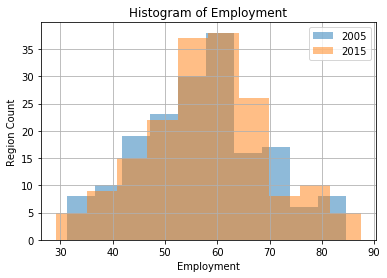

In [27]:
#Employment
df_final.employment_2005.hist(label='2005', alpha=.5, figsize=(6,4));
df_final.employment_2015.hist(label='2015', alpha=.5, figsize=(6,4));
plt.title("Histogram of Employment")
plt.xlabel("Employment")
plt.ylabel("Region Count")
plt.legend();

**Result** : Overall looks good, however 5 regions in the first bin looks a decrease in the employment. However on the other end there is increase for 5 regions at the last bin. 

##### **Income **
Histogram compare for Income. The below comparison helps to understand if there are changes in Income across regions in 2015 since 2005.

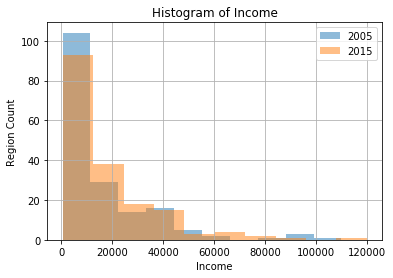

In [28]:
#Income
df_final.income_2005.hist(label='2005', alpha=.5, figsize=(6,4));
df_final.income_2015.hist(label='2015', alpha=.5, figsize=(6,4));
plt.title("Histogram of Income")
plt.xlabel("Income")
plt.ylabel("Region Count")
plt.legend();

**Result** : Low income range has reduced 20%, which is shifted from 0-10,000 to 10,000 to 20,000 bin. A positive shift.

Create a difference value for income and life expectancy where were the key attributes in this analysis. The difference will be later used in variance reports created later.`

In [39]:
#df_final['life_exp_diff'] = df_final['life_expectancy_2015'] - df_final['life_expectancy_2005']
df_final.insert(3, 'life_exp_diff', df_final['life_expectancy_2015'] - df_final['life_expectancy_2005'])
#df_final['income_diff'] = df_final['income_2015'] - df_final['income_2005']
df_final.insert(12, 'income_diff', df_final['income_2015'] - df_final['income_2005'])

#df_final.drop(df_final.life_exp_diff.index, inplace=True)

df_final.head(10)

,country,life_expectancy_2005,life_expectancy_2015,life_exp_diff,basic_sanitation_2005,basic_sanitation_2015,water_source_2005,water_source_2015,population_growth_2005,population_growth_2015,income_2005,income_2015,income_diff,employment_2005,employment_2015,gdp_2005,gdp_2015
0,Afghanistan,53.9,57.9,4.0,28.1,39.2,37.3,63.0,3.870,2.940,1140,1750,610,48.5,49.1,9760.0,20900.0
1,Albania,74.9,77.6,2.7,92.2,97.7,87.9,91.4,-0.512,-0.291,7460,11000,3540,47.8,46.8,9600.0,13000.0
2,Algeria,75.4,77.3,1.9,85.3,87.5,91.2,93.5,1.380,1.920,12300,13700,1400,36.0,36.8,142000.0,190000.0
3,Angola,56.5,64.0,7.5,26.7,39.4,39.0,41.0,3.580,3.430,3950,6230,2280,61.0,72.1,46700.0,104000.0
4,Argentina,75.2,76.5,1.3,94.8,94.8,99.2,99.6,1.070,1.010,15500,19100,3600,54.9,55.7,334000.0,456000.0
5,Armenia,72.5,75.4,2.9,90.8,91.6,96.7,98.9,-0.647,0.369,5360,8180,2820,46.9,48.9,7670.0,11500.0
6,Australia,81.1,82.6,1.5,100.0,100.0,99.8,100.0,1.320,1.460,38900,43800,4900,61.3,61.1,994000.0,1310000.0
7,Austria,79.5,81.4,1.9,100.0,100.0,100.0,100.0,0.681,1.120,41200,44100,2900,54.8,56.7,367000.0,414000.0
8,Azerbaijan,67.6,71.8,4.2,73.7,89.3,79.1,84.4,1.020,1.190,8050,16700,8650,58.8,62.3,24800.0,59000.0
9,Bahamas,73.0,73.6,0.6,90.0,92.0,98.1,97.8,2.060,1.210,25400,21700,-3700,67.8,66.6,10200.0,10500.0


<a id='Research_life_expectancy'></a>
### Research Life Expectancy

Creating correlations between different indicators to check which ones are connected to life expectancy. 2005, 2015 both are taken separately to also compare if the correlation is persistent.

The following is perfomed to answer the first question on the correlation of indicators for Life Expectancy.

##**Life Expectancy / Basic Sanitation**

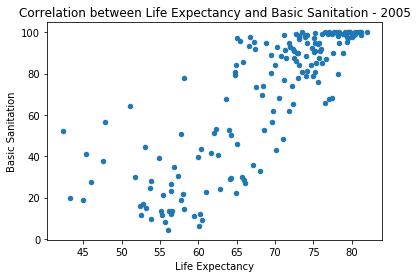

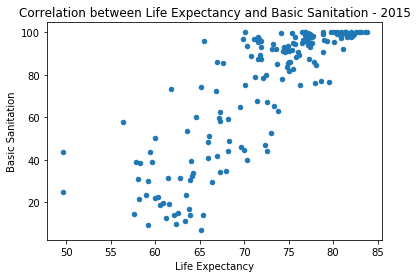

In [33]:
df_final.plot(title='Correlation between Life Expectancy and Basic Sanitation - 2005', 
              kind='scatter', x='life_expectancy_2005', y='basic_sanitation_2005');
plt.xlabel("Life Expectancy");
plt.ylabel("Basic Sanitation");

df_final.plot(title='Correlation between Life Expectancy and Basic Sanitation - 2015', 
                  kind='scatter', x='life_expectancy_2015', y='basic_sanitation_2015');
plt.xlabel("Life Expectancy");
plt.ylabel("Basic Sanitation");

##**Life Expectancy / Water Source**

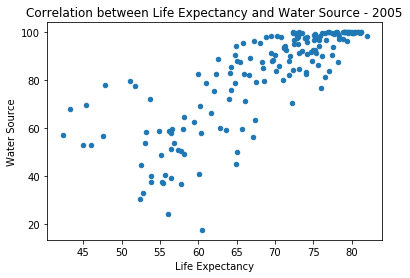

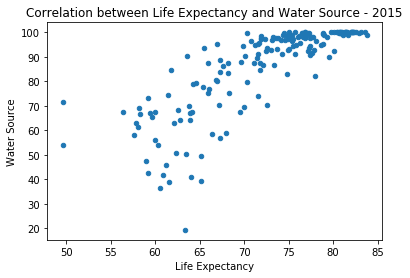

In [34]:
df_final.plot(title='Correlation between Life Expectancy and Water Source - 2005',
                  kind='scatter', x='life_expectancy_2005', y='water_source_2005');

plt.xlabel("Life Expectancy");
plt.ylabel("Water Source");

df_final.plot(title='Correlation between Life Expectancy and Water Source - 2015',
                  kind='scatter', x='life_expectancy_2015', y='water_source_2015');
plt.xlabel("Life Expectancy");
plt.ylabel("Water Source");

##**Life Expectancy / Income**`

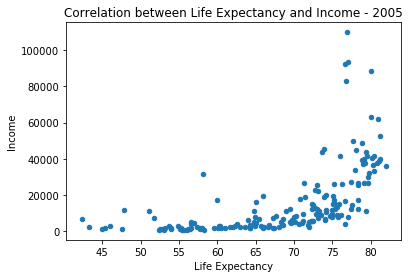

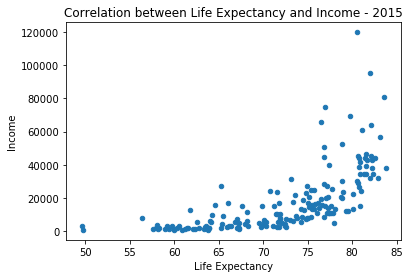

In [35]:
df_final.plot(title='Correlation between Life Expectancy and Income - 2005',
                  kind='scatter', x='life_expectancy_2005', y='income_2005');
plt.xlabel("Life Expectancy");
plt.ylabel("Income");

df_final.plot(title='Correlation between Life Expectancy and Income - 2015',
                  kind='scatter', x='life_expectancy_2015', y='income_2015');

plt.xlabel("Life Expectancy");
plt.ylabel("Income");

##**Life Expectancy / Employment**

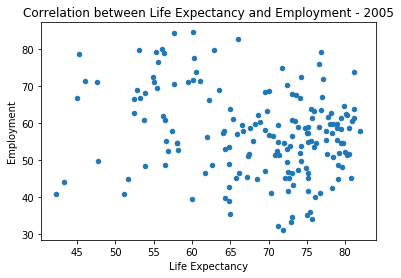

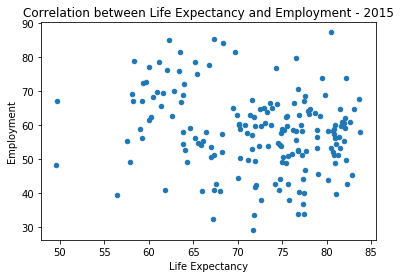

In [73]:
df_final.plot(title='Correlation between Life Expectancy and Employment - 2005',
                  kind='scatter', x='life_expectancy_2005', y='employment_2005');
plt.xlabel("Life Expectancy");
plt.ylabel("Employment");

df_final.plot(title='Correlation between Life Expectancy and Employment - 2015',
                  kind='scatter', x='life_expectancy_2015', y='employment_2015');
plt.xlabel("Life Expectancy");
plt.ylabel("Employment");

###### Are there any indicators that correlates with Life Expectancy? The answer is yes
**1. water source.**
**2. basic sanitation.**


preparing data for producing top 20 regions on life expectancy.
separate data frames created to pull the top 20 regions by life exp for 2005 and 2015. Also seperate data frames are created for top 20 and least 20 regions on life expectancy variation.

In [63]:
##Data frames created for top 20 countries by life exp (2005, 2015)
df_life_exp_top2005 = df_final.sort_values('life_expectancy_2005', ascending=False).head(20);
df_life_exp_top2015 = df_final.sort_values('life_expectancy_2015', ascending=False).head(20);
##top countries improved by life exp
df_life_exp_topdiff = df_final.sort_values('life_exp_diff', ascending=False).head(20);
##least countries improved by life exp
df_life_exp_topnegdiff = df_final.sort_values('life_exp_diff', ascending=True).head(20);


Top 20 Countries by increased life expectancy

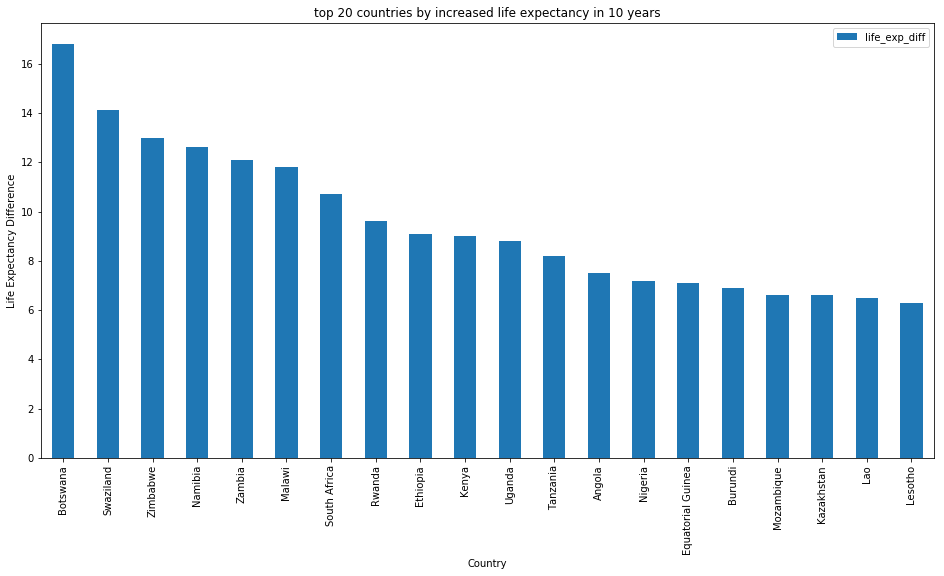

In [86]:
###Bar charts to display top 20 countries by increase in life expectancy 
df_life_exp_topdiff.plot(title='top 20 countries by increased life expectancy in 10 years', 
                             kind='bar',x='country', y= 'life_exp_diff',figsize=(16,8));
plt.xlabel("Country");
plt.ylabel("Life Expectancy Difference");

Last 20 Countries by increased life expectancy - this was triggered to know if there are regions experiencing decrease in the life expectancy.

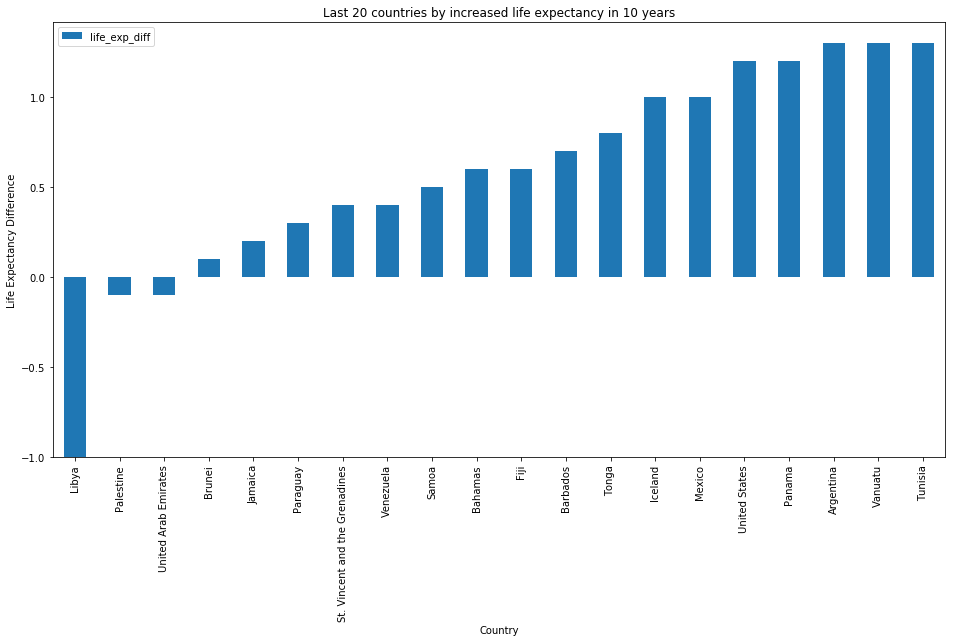

In [85]:
###Bar charts to display last 20 countries by increase in life expectancy 
df_life_exp_topnegdiff.plot(title='Last 20 countries by increased life expectancy in 10 years', 
                             kind='bar',x='country', y= 'life_exp_diff',figsize=(16,8));
plt.xlabel("Country");
plt.ylabel("Life Expectancy Difference");

<a id='research_income'></a>
### Research Income

Creating correlations between different indicators to check which ones are connected to Income. 2005, 2015 both are taken separately to also compare if the correlation is persistent.

The following is perfomed to answer the first question on the correlation of indicators for Income.

##**Income / Population Growth**


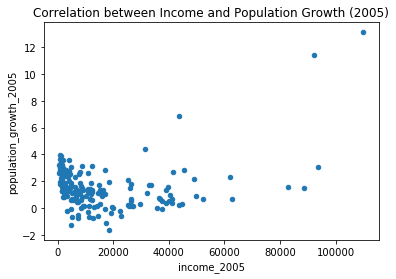

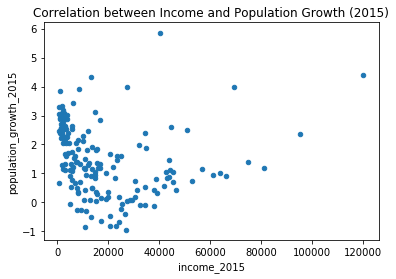

In [398]:
##Correlation check between income and population growth (2005, 2015)
df_final.plot(title = 'Correlation between Income and Population Growth (2005)',
                  kind='scatter', x='income_2005', y='population_growth_2005');
df_final.plot(title = 'Correlation between Income and Population Growth (2015)',
              kind='scatter', x='income_2015', y='population_growth_2015');

##**Income / Employment**

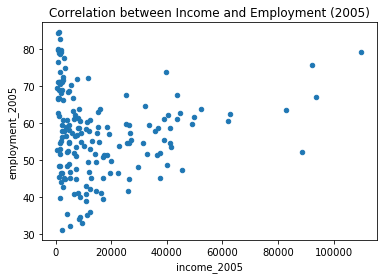

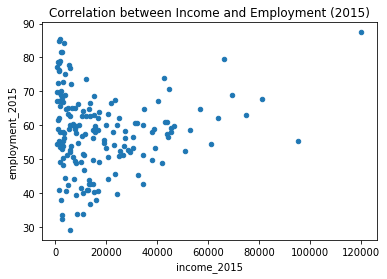

In [397]:
##Correlation check between income and employment (2005, 2015)
df_final.plot(title = 'Correlation between Income and Employment (2005)',
                  kind='scatter', x='income_2005', y='employment_2005');
df_final.plot(title = 'Correlation between Income and Employment (2015)',
                kind='scatter', x='income_2015', y='employment_2015');

##### Result : ###### The income has no correlation with any other indicators. 

Top regions by income variance since 2005, this is one of the questions in my analysis. 
Seperate data frame is created with 10 regions sorted by income difference descending. Using the Data frame bar chart is plotted to display the 2005, 2015 and variance.

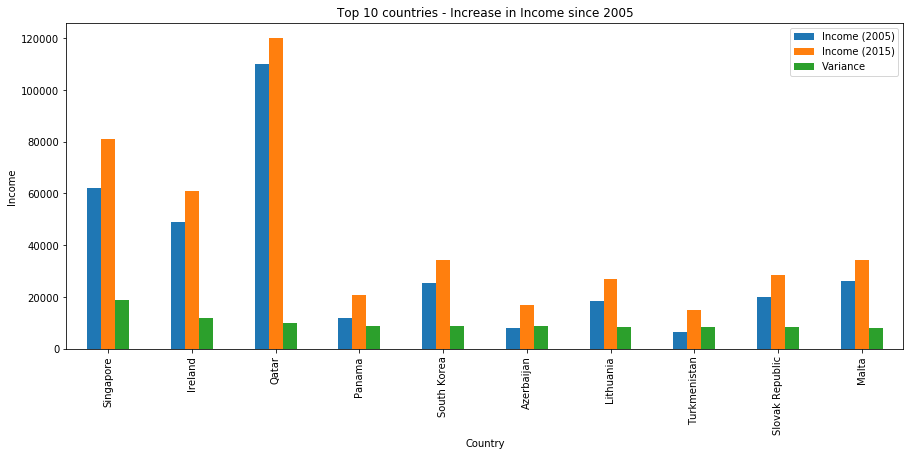

In [84]:
##Top 10 countries increased by income
df_top10_income = df_final.sort_values('income_diff', ascending=False).head(10).iloc[:, np.r_[0, 10,11,12]]
df_top10_income.set_index(df_top10_income['country'], inplace=True)
df_top10_income.plot(title='Top 10 countries - Increase in Income since 2005', kind='bar',figsize=(15,6));
plt.xlabel("Country");
plt.ylabel("Income");
plt.legend(['Income (2005)', 'Income (2015)', 'Variance']);

##### Result.
Singapore, Ireland and Qatar shows the top 3 in the list.

Top 10 regions in 2005 which had high income along with the 2015 income variance. A Data frame is created with the required columns filtering the top 10 2005 income regions.

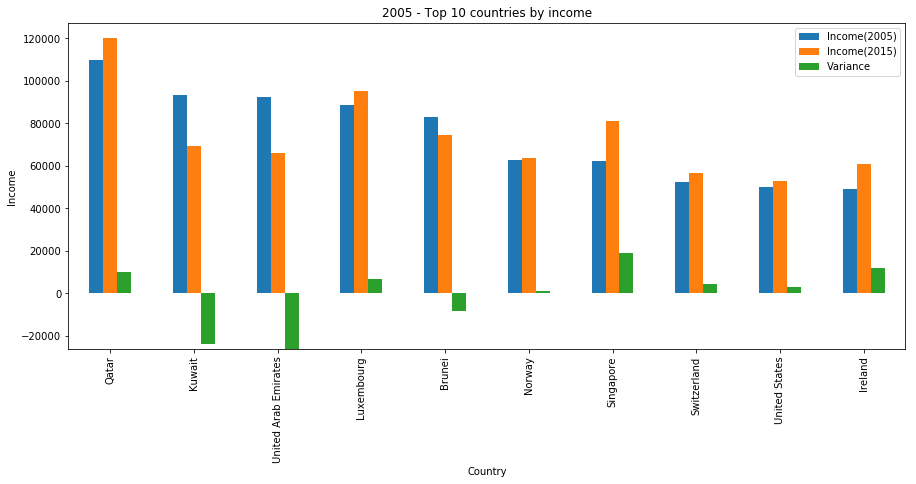

In [87]:
#####2015 top 10 countries listed by income 2005
df_top10_income = df_final.sort_values('income_2005', ascending=False).head(10).iloc[:, np.r_[0, 10,11,12]]
#df_top10_income.reindex(df_top10_income['country'])
df_top10_income.set_index(df_top10_income['country'], inplace=True)
df_top10_income.plot(title='2005 - Top 10 countries by income', 
                     kind='bar',figsize=(15,6));
plt.xlabel("Country");
plt.ylabel("Income");
plt.legend(['Income(2005)', 'Income(2015)', 'Variance']);

##### Result
Interestingly the Kuwait, UAE and Brunei with 2,3,5 rankings in 2005 had a decrease in the income in 2015.

Top 10 regions in 2015 which had high income along with the 2005 income variance. A Data frame is created with the required columns filtering the top 10 2015 income regions.

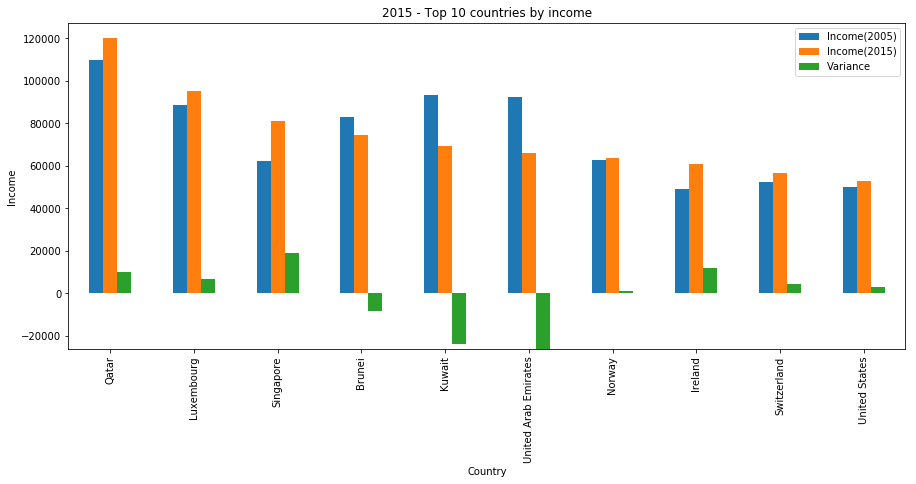

In [88]:
#####2015 top 10 countries listed by income 2015
df_top10_income = df_final.sort_values('income_2015', ascending=False).head(10).iloc[:, np.r_[0, 10,11,12]]
#df_top10_income.reindex(df_top10_income['country'])
df_top10_income.set_index(df_top10_income['country'], inplace=True)
df_top10_income.plot(title='2015 - Top 10 countries by income', 
                     kind='bar',figsize=(15,6));
plt.xlabel("Country");
plt.ylabel("Income");
plt.legend(['Income(2005)', 'Income(2015)', 'Variance']);

##### Result
Countries Brunei, Kuwait & UAE though they are still under top 10 countries with high income, the income since 2005 has reduced.

<a id='conclusions'></a>
## Conclusions
**Limitations**
* There were very few missing data found in basic sanitation and water source data. The missing data since its minimal, it was replaced by mean values.
* Very few data sets had data till 2018, all indicator information is available till 2015. Due to this the year was set to 2015 and for comparison year 2005 data was considered to compare 10 years variance.

### Life Expectancy Analysis
    * Top 5 regions which improved life expectancy over 10 years - Botswana, Swaziland, Zimbabwe, Namibia, Zambia.
    * Two factors Water and Sanitation influenced the life expectancy.
    * In general, life expectancy has improved over the past 10 years, most of the countries had increase in the life expectancy.
    * Sanitation has improved in most of the countries, which correlated with increase in life expectancy.
    * Libya, Palestine and UAE have the life expectancy reduced - Libya a year reduction, while Palestine and UAE in fractions.
    

### Income Analysis
    * Top 5 regions which improved in income over 10 years - Singapore, Ireland, Quatar, Panama, South Korea.
    * Income is not correlated to any other indicators.
    * Qatar remains top country for income since 2005.
    * Countries UAE, Kuwait, Brunei had a decrease in the income, and the positions were shuffled in 2015.
    * Luxemborg positioned on no 2 in 2015, after the decrease of UAE, Kuwait & Brunei.
    * Inspite of decrease, still UAE, Kuwait & Brunei is under 10 ten list.

